<a href="https://colab.research.google.com/github/Nayeong127/meotjin_yeongna/blob/main/220222_%EB%94%A5%EB%9F%AC%EB%8B%9DNLP%EC%9E%85%EB%AC%B8_CH4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03. 언어 모델(Language Model)**

언어 모델(Languagel Model): 단어 시퀀스(문장)에 확률을 할당하는 모델
-> 이 문장 적절/ㄴ

## **1) 언어 모델(Language Model)이란?**

언어 모델을 만드는 방법
1. 통계를 이용한 방법
  - 실제 사용하는 자연어를 근사하기에는 많은 한계
2. 인공 신경망을 이용한 방법 
  - 더 좋은 성능
  - 자연어 처리의 기술인 GPT나 BERT 

### **1. 언어 모델(Language Model)**

언어 모델은 단어 시퀀스에 확률을 할당(assign) 하는 일을 하는 모델=가장 자연스러운 단어 시퀀스를 찾아내는 모델!!
- 보편적 방법: 이전 단어들이 주어졌을 때 다음 단어를 예측
- 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델 (BERT)

*언어 모델링(Language Modeling): 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업.(이전 단어들로부터 다음 단어를 예측하는 일)*

### **2. 단어 시퀀스의 확률 할당**

자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까요?

**a. 기계 번역(Machine Translation):**

P(나는 버스를 탔다) > P(나는 버스를 태운다)


**b. 오타 교정(Spell Correction)**

선생님이 교실로 부리나케
P(달려갔다) > P(잘려갔다)


**c. 음성 인식(Speech Recognition)**

P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)

<font color=red>언어 모델은 확률을 통해 보다 적절한 문장을 판단~!!!

### **3. 주어진 이전 단어들로부터 다음 단어 예측하기**

확률 할당하기 위해 조건부 확률!
- 이전 단어를 보고 다음 단어 예측

**A. 단어 시퀀스의 확률**

하나의 단어를 w, 단어 시퀀스을 대문자 W라고 한다면, n개의 단어가 등장하는 단어 시퀀스 W의 확률

P(W)=P(w1,w2,w3,w4,w5,...,wn)

**B. 다음 단어 등장 확률**

n-1개의 단어가 나열된 상태에서 n번째 단어의 확률

P(wn|w1,...,wn−1)

예를 들어 다섯번째 단어의 확률은 아래와 같습니다.

P(w5|w1,w2,w3,w4)

전체 단어 시퀀스 W의 확률은 모든 단어가 예측되고 나서야 알 수 있으므로 단어 시퀀스의 확률은 다음과 같습니다.

P(W)=P(w1,w2,w3,w4,w5,...wn)



### **4. 언어 모델의 간단한 직관**

지각을 하는 바람에 비행기를 [?]라는 문장이 있습니다.사람은 쉽게 '놓쳤다'라고 예상할 수 있습니다. 우리 지식에 기반하여 나올 수 있는 여러 단어들을 후보에 놓고 놓쳤다는 단어가 나올 확률이 가장 높다고 판단하였기 때문입니다.

기계도 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택합니다.

### **5. 검색 엔진에서의 언어 모델의 예**

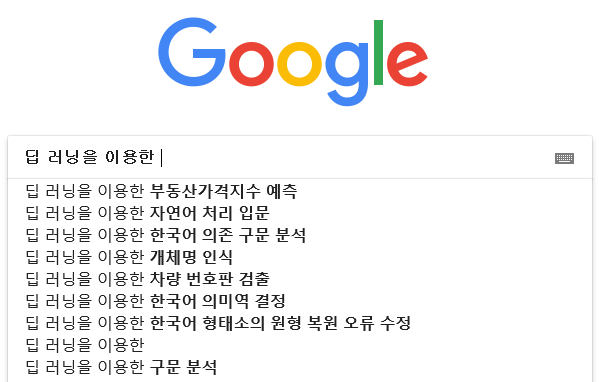

검색 엔진이 입력된 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있습니다.

## **2) 통계적 언어 모델(Statistical Language Model, SLM)**

통계적 언어 모델이 통계적인 접근 방법으로 어떻게 언어를 모델링 하는지




### **1. 조건부 확률**

조건부 확률은 두 확률 P(A),P(B)에 대해서 아래와 같은 관계를 갖습니다.
- p(B|A)=P(A,B)/P(A)
- P(A,B)=P(A)P(B|A)

4개의 확률이 조건부 확률

P(A,B,C,D)=P(A)P(B|A)P(C|A,B)P(D|A,B,C)


P(x1,x2,x3...xn)=P(x1)P(x2|x1)P(x3|x1,x2)...P(xn|x1...xn−1)

-> 조건부 확률의 연쇄 법칙(chain rule)

### **2. 문장에 대한 확률**
P(An adorable little boy is spreading smiles)

- 각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어-> 문장의 확률을 구하고자 조건부 확률을 사용

P(An adorable little boy is spreading smiles)=

P(An)×P(adorable|An)×P(little|An adorable)×P(boy|An adorable little)×P(is|An adorable little boy)×P(spreading|An adorable little boy is)×P(smiles|An adorable little boy is spreading)


문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱합니다.

### **3. 카운트 기반의 접근**

SLM은 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구하냐면~ 카운트에 기반하여 확률을 계산!!!!!!!!

An adorable little boy가 나왔을 때, is가 나올 확률인 P(is|An adorable little boy)를 구해봅시다. 
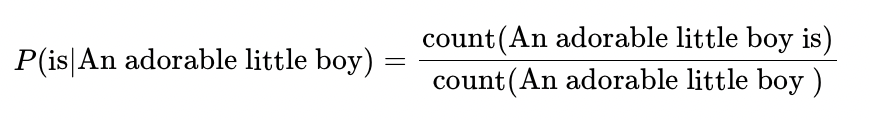


예를 들어 기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다. 이 경우 P(is|An adorable little boy)는 30%입니다.

### **4. 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)**


현실에서도 An adorable little boy가 나왔을 때 is가 나올 확률 존재.-> 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭 
- 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표
  - 코퍼스(기계가 훈련하는 데이터)는 정말 방대한 양이 필요!!!!!!
  - P(is|An adorable little boy)를 구하는 경우에서 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 이 단어 시퀀스에 대한 확률은 0
  - 또는 An adorable little boy가 없으면 (분모 0되니까) 정의되지 못하는 확률이 됨!
-  코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것이 정확한 모델링이 아니지~ 현실에서 말 되니까


희소 문제(sparsity problem): 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제

-> 완화) n-gram 언어 모델, 스무딩이나 백오프와 같은 여러가지 일반화(generalization) 기법

하지만 희소 문제에 대한 근본적인 해결책은 되지 못하였습니다. 결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다.

## **3) N-gram 언어 모델(N-gram Language Model)**

n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 

BUTTT 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어(n개)만 고려하는 접근 방법을 사용!!!!!!!!

### **1. 코퍼스에서 카운트하지 못하는 경우의 감소.**

SLM의 한계
- 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다
- 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. 

-> 카운트할 수 없을 가능성이 높습니다.

-> 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성이 높일 수 있습니다.

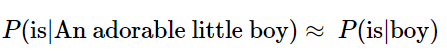

An adorable little boy가 나왔을 때 is가 나올 확률 ->  boy가 나왔을 때 is가 나올 확률로 생각해보는 건 어떨까요?!!!

갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높습니다.

 little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 오케이

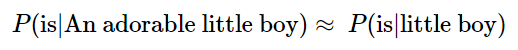

즉, 앞에서는 An adorable little boy가 나왔을 때 is가 나올 확률을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, 이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, **앞 단어 중 임의의 개수만 포함해서 카운트하여 근사**하자는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

### **2. N-gram**


 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다. 
 
 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram

- unigrams : an, adorable, little, boy, is, spreading, smiles
- bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
- trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
- 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. n=4라고 한 4-gram을 이용한 언어 모델은 n-1에 해당되는 앞의 3개의 단어만을 고려

🎃그니까 4은 그 청크고 3개를 보고 뒤에 4번째 예측한다고

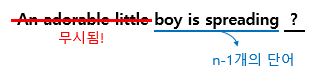

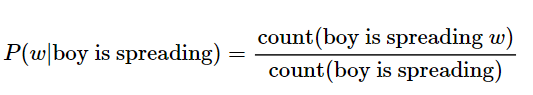

만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.

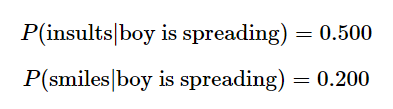

**3. N-gram Language Model의 한계**

4-gram 언어 모델은 주어진 문장에서 앞에 있던 단어인 '작고 사랑스러운(an adorable little)'이라는 수식어를 제거하고, 반영하지 않았습니다. 그런데 '작고 사랑스러운' 수식어까지 모두 고려하여 작고 사랑하는 소년이 하는 행동에 대해 다음 단어를 예측하는 언어 모델이었다면 과연 '작고 사랑스러운 소년이' '모욕을 퍼트렸다'라는 부정적인 내용이 '웃음 지었다'라는 긍정적인 내용 대신 선택되었을까요?

 n-gram은 뒤의 단어 몇 개만 보다 보니 **의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다는 점입니다**. 문장을 읽다 보면 앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우도 생길 수 있습니다. 
 
 -> 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없습니다. 
 
 
 
  **n-gram 모델에 대한 한계점**

1. 희소 문제(Sparsity Problem)
- n-gram 언어 모델도 여전히 희소 문제가 존재합니다.

2. n을 선택하는 것은 진퇴유곡
- n을 1보다는 2로 선택하는 것은 거의 대부분의 경우에서 언어 모델의 성능을 높일 수 있습니다. 가령, spreading만 보는 것보다는 is spreading을 보고 다음 단어를 예측하는 것이 더 정확하기 때문입니다. 이 경우 훈련 데이터가 적절한 데이터였다면 언어 모델이 적어도 spreading 다음에 동사를 고르지 않을 것입니다.
🎃spreading is..

- n을 **크게** 선택하면 
  - 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해집니다.
  - 모델 사이즈가 커진다는 문제점도 있습니다. 기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문입니다.
  🎃아까 나열한 유니/바이/..그램들에 대해 다 해야 하니까!

- n을 **작게** 선택하면 
 - 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다. 
 
-> 그렇기 때문에 적절한 n을 선택해야 합니다. 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다.

- n이 성능에 영향을 주는 것을 확인할 수 있는 유명한 예제 
 - 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때 다음과 같은 성능이 나왔다고 합니다. *펄플렉서티(perplexity)는 수치가 낮을수록 더 좋은 성능을 나타냅니다.* 
위의 결과는 n을 1에서 2, 2에서 3으로 올릴 때마다 성능이 올라가는 것을 보여줍니다.

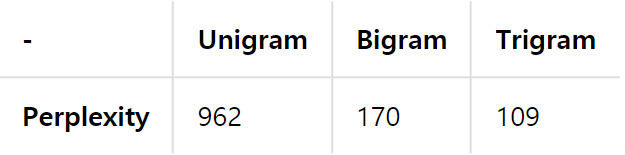


### **4. 적용 분야(Domain)에 맞는 코퍼스의 수집**

어떤 분야인지, 어떤 어플리케이션인지에 따라서 특정 단어들의 확률 분포는 당연히 다릅니다. 가령, 마케팅 분야에서는 마케팅 단어가 빈번하게 등장할 것이고, 의료 분야에서는 의료 관련 단어가 당연히 빈번하게 등장합니다. 이 경우 **언어 모델에 사용하는 코퍼스를 해당 도메인의 코퍼스를 사용한다면 당연히 언어 모델이 제대로 된 언어 생성을 할 가능성이 높아집니다**.

### **5. 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)**

N-gram Language Model의 한계점을 극복하기 위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 일반화(generalization) 방법들이 존재합니다. 

그럼에도 본질적으로 n-gram 언어 모델에 대한 취약점을 완전히 해결하지는 못하였고, 이를 위한 대안으로 성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용되고 있습니다. 



## **4)한국어에서의 언어 모델(Language Model for Korean Sentences)**
영어나 기타 언어에 비해서 한국어는 언어 모델로 다음 단어를 예측하기가 훨씬 까다롭습니다.  한국어 자연어 처리는 그만큼 영어보다 훨씬 어렵습니다.

### **1. 한국어는 어순이 중요하지 않다.**

한국어에서는 어순이 중요하지 않습니다. 그래서 이전 단어가 주어졌을때, 다음 단어가 나타날 확률을 구해야하는데 어순이 중요하지 않다는 것은 어떤 단어든 나타나도 된다는 의미입니다.

Ex)
1. 나는 운동을 합니다 체육관에서.
2. 나는 체육관에서 운동을 합니다.
3. 체육관에서 운동을 합니다.
4. 나는 운동을 체육관에서 합니다.

4개의 문장은 전부 의미가 통하는 것을 볼 수 있습니다. 심지어 '나는' 이라는 주어를 생략해도 말이 되버립니다. 이렇게 단어 순서를 뒤죽박죽으로 바꾸어놔도 한국어는 의미가 전달 되기 때문에 **확률에 기반한 언어 모델이 제대로 다음 단어를 예측하기가 어렵습니다.**

🎃 나는 운동을 합니다.. 
 - 체육관에서/매일/친구와/열심히 등...~

### **2. 한국어는 교착어이다.**

 띄어쓰기 단위인 어절 단위로 토큰화를 할 경우에는 문장에서 발생가능한 단어의 수가 굉장히 늘어납.
🎃내가.. (철수/영희/보라)(와/를/에게/한테/...)

-> 한국어에서는 토큰화를 통해 접사나 조사 등을 분리하는 것은 중요한 작업이 되기도 합니다. 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많거든


### **3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.**

한국어는 띄어쓰기를 제대로 하지 않아도 의미가 전달되며, 띄어쓰기 규칙 또한 상대적으로 까다로운 언어이기 때문에 자연어 처리를 하는 것에 있어서 한국어 코퍼스는 띄어쓰기가 제대로 지켜지지 않는 경우가 많습니다.**토큰이 제대로 분리 되지 않은 채 훈련 데이터로 사용된다면 언어 모델은 제대로 동작하지 않습니다.**
🎃뭉텅이로 작성한 텍스트를 컴퓨터가 정확하게 인식하는 것이 어렵다는 점입니다. 예측에서의 어려움이 아니라~ 훈련에서!!

## **5)펄플렉서티(Perplexity)**
두 개의 모델 A, B가 있을 때 이 모델의 성능은 어떻게 비교할 수 있을까요? 
- 오타 교정, 기계 번역 등의 평가,해당 업무의 성능을 누가 더 잘했는지를 비교 

그런데 두 모델의 성능을 비교하고자, 일일이 모델들에 대해서 실제 작업을 시켜보고 정확도를 비교하는 작업은 공수가 너무 많이 드는 작업입니다. - 외부 평가(extrinsic evaluation)

-> 조금은 부정확할 수는 있어도 테스트 데이터에 대해서 빠르게 식으로 계산되는 더 간단한 평가 방법!! **모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 내부 평가(Intrinsic evaluation)에 해당되는 펄플렉서티(perplexity)**

## **1. 언어 모델의 평가 방법(Evaluation metric) : PPL.**

펄플렉서티: 언어 모델을 평가하기 위한 내부 평가 지표- PPL

 PPL은 '헷갈리는 정도'로 이해합시다.  '낮을수록' 언어 모델의 성능이 좋다는 것

🌹🌹
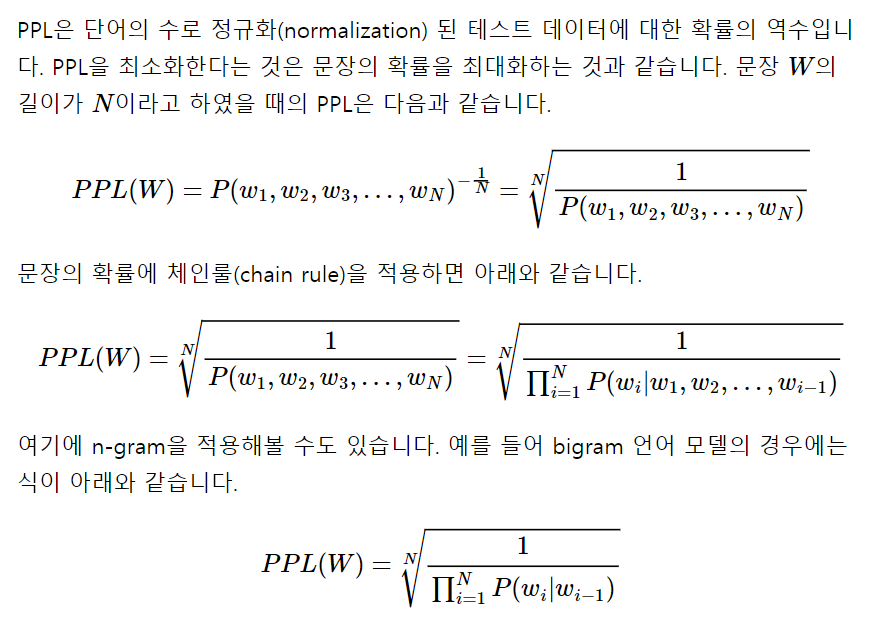

## **2. 분기 계수(Branching factor)**

**PPL은 이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지**
 - 가령, 언어 모델에 어떤 테스트 데이터을 주고 측정했더니 PPL이 10이 나왔다고 해봅시다. 그렇다면 해당 언어 모델은 테스트 데이터에 대해서 다음 단어를 예측하는 모든 시점(time-step)마다 평균적으로 10개의 단어를 가지고 어떤 것이 정답인지 고민하고 있다고 볼 수 있습니다. 

- 같은 테스트 데이터에 대해서 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 어떤 것이 성능이 좋은지도 판단이 가능합니다. 

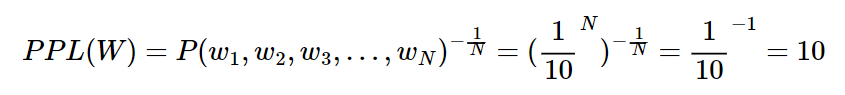 


- PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것이지, **사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다는 점입니다.** 
🎃1이 나와서 한 개씩만 고민한다 해도 코퍼스가 작어서 그런 걸수도 있고~
- 언어 모델의 PPL은 테스트 데이터에 의존하므로 두 개 이상의 언어 모델을 비교할 때는 정량적으로 양이 많고, 🏓새로운 작은 데이터로 하는 게 아니라 큰 데이터로 해야 해서!?!?!?!? 
- 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높다는 것입니다.

### **3. 기존 언어 모델 Vs. 인공 신경망을 이용한 언어 모델.**

PPL의 실제 사용 사례

페이스북 AI 연구팀은 우리가 앞서 배운 n-gram 언어 모델과 이후 배우게 될 딥 러닝을 이용한 언어 모델에 대해서 PPL로 성능 테스트를 한 표를 공개한 바 있습니다.

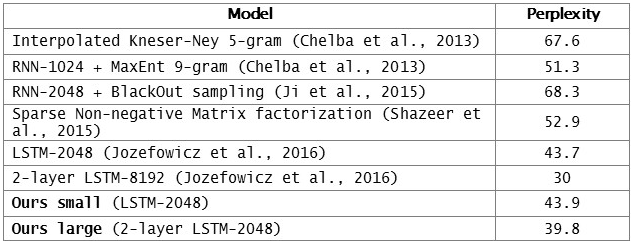

링크 : https://research.fb.com/building-an-efficient-neural-language-model-over-a-billion-words/

- n-gram- PPL이 67.6으로 측정되었습니다. 5-gram 앞에 Interpolated Kneser-Ney라는 이름이 붙었는데 이 책에서는 별도 설명을 생략하겠다고 했던 일반화(generalization) 방법이 사용된 모델입니다.
- 그 아래의 모델들은 인공 신경망을 이용한 언어 모델들로 대부분 n-gram을 이용한 언어 모델보다 더 좋은 성능 평가를 받았음을 확인할 수 있습니다.



## **6)조건부 확률(Conditional Probability)**

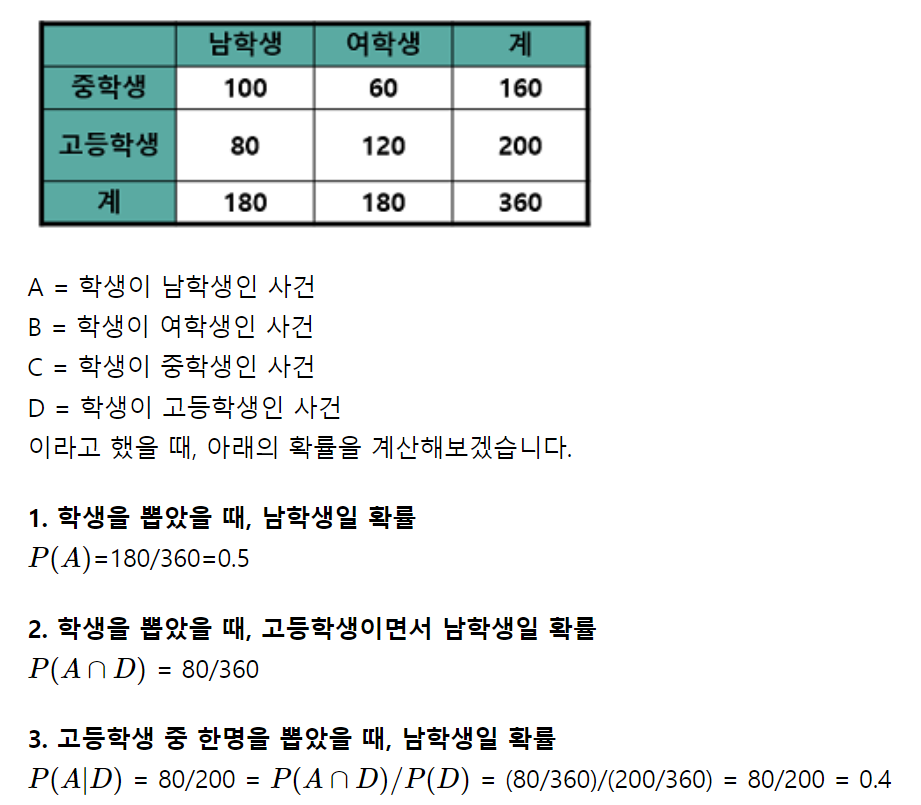

# **04. 카운트 기반의 단어 표현(Count based word Representation)**

 머신 러닝 등의 알고리즘이 적용된 본격적인 자연어 처리를 위해서는 **문자를 숫자로 수치화**할 필요가 있습니다.

## **1)다양한 단어의 표현 방법**

 카운트 기반의 단어 표현 방법 외에도 다양한 단어의 표현 방법에는 어떤 것이 있나

### **1.단어의 표현 방법**

단어의 표현 방법은 크게 국소 표현(Local Representation) 방법과 분산 표현(Distributed Representation) 방법
- 국소 표현 방법은 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현 
- 분산 표현 방법은 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법

예를 들어 puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때
-  각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여한다면 이는 국소 표현 방법에 해당됩니다.
- 분산 표현 방법의 예를 하나 들어보면 해당 단어를 표현하기 위해 주변 단어를 참고합니다. puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의합니다. 

-> 이렇게 되면 이 두 방법의 차이는 국소 표현 방법은 단어의 의미, 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있게 됩니다.

국소 표현 방법(Local Representation)= 이산 표현(Discrete Representation)=분산 표현(Distributed Representation)=연속 표현(Continuous Represnetation)


토마스 미코로브(Tomas Mikolov)는  LSA나 LDA와 같은 방법들은 단어의 의미를 표현할 수 있다는 점에서 연속 표현(Continuous Represnetation)이지만, 엄밀히 말해서 다른 접근의 방법론을 사용하고 있는 워드투벡터(Word2vec)와 같은 분산 표현(Distributed Representation)은 아닌 것으로 분류하여 연속 표현을 분산 표현을 포괄하고 있는 더 큰 개념으로 설명하기도 했습니다.
🌹🌹ㅎㅎ



### **2.단어 표현의 카테고리화**

그렇대~


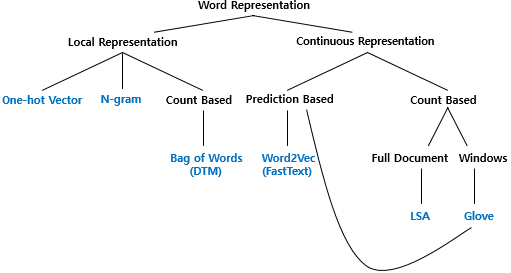

이번 4챕터의 Bag of Words는 국소 표현에(Local Representation)에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법입니다. 이 챕터에서는 BoW와 그의 확장인 DTM(또는 TDM)에 대해서 학습하고, 이러한 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해서 학습합니다.

6챕터에서는 단어의 뉘앙스를 반영하는 연속 표현(Continuous Representation)의 일종인 LSA를 토픽 모델링이라는 주제로 학습합니다.

10챕터에서는 연속 표현(Continuous Representation)에 속하면서, 예측(prediction)을 기반으로 단어의 뉘앙스를 표현하는 워드투벡터(Word2Vec)와 그의 확장인 패스트텍스트(FastText)를 학습하고, 예측과 카운트라는 두 가지 방법이 모두 사용된 글로브(GloVe)에 대해서 학습합니다.

## **2)Bag of Words(BoW)**

단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법인 Bag of Words


## **1. Bag of Words란?**

Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법


BoW를 만드는 과정을 이렇게 두 가지 과정으로 생각해보겠습니다.
1. 우선, 각 단어에 고유한 정수 인덱스를 부여합니다.
2. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.

한국어 예제를 통해서 BoW에 대해서 이해해보도록 하겠습니다.
> 문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

위의 문서1에 대해서 BoW를 만들어보도록 하겠습니다.

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 60.7 MB/s 
     |████████████████████████████████| 448 kB 37.9 MB/s 


In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
a=[]
a.insert(0,1)
print(a)

[1]


In [ ]:
bow  

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

문서1에 각 단어에 대해서 인덱스를 부여한 결과는 첫번째 출력 결과입니다. 문서1의 BoW는 두번째 출력 결과입니다. 두번째 출력 결과를 보면, 물가상승률의 인덱스는 4이며, 문서1에서 물가상승률은 2번 언급되었기 때문에 인덱스 4(다섯번째 값)에 해당하는 값이 2임을 알 수 있습니다. (원한다면 한국어에서 불용어에 해당되는 조사들 또한 제거하여 더 정제된 BoW를 만들 수도 있습니다.)

**2.Bag of Words의 다른 예제들**

앞서 언급했듯이, BoW에 있어서 중요한 것은 단어의 등장 빈도입니다. 단어의 순서. 즉, 인덱스의 순서는 전혀 상관없습니다. 문서1에 대한 인덱스 할당을 임의로 바꾸고 그에 따른 BoW를 만든다고 해봅시다.

In [ ]:
# ('발표': 0, '가': 1, '정부': 2, '하는': 3, '소비자': 4, '과': 5, '물가상승률': 6, '느끼는': 7, '은': 8, '다르다': 9)  
#위의 BoW는 단지 단어들의 인덱스만 바뀌었을 뿐이며, 개념적으로는 여전히 앞서 만든 BoW와 동일한 BoW로 취급할 수 있습니다.

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

> 문서2 : 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

만약, 위의 코드에 문서2로 입력으로 하여 인덱스 할당과 BoW를 만드는 것을 진행한다면 아래와 같은 결과가 나옵니다.

In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}


In [ ]:
bow

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]

문서1과 문서2를 합쳐서 (이를 문서3이라고 명명합시다.) BoW를 만들 수도 있습니다.

> 문서3: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

위의 코드에 문서3을 입력으로 하여 인덱스 할당과 BoW를 만든다면 아래와 같은 결과가 나옵니다.

In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}


In [ ]:
bow

[1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]

문서3의 단어 집합은 문서1과 문서2의 단어들을 모두 포함하고 있는 것들을 볼 수 있습니다. BoW는 종종 여러 문서의 단어 집합을 합친 뒤에, 해당 단어 집합에 대한 각 문서의 BoW를 구하기도 합니다. 가령, 문서3에 대한 단어 집합을 기준으로 문서1, 문서2의 BoW를 만든다고 한다면 결과는 아래와 같습니다



```
# 문서3 단어 집합에 대한 문서1 BoW : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  
문서3 단어 집합에 대한 문서2 BoW : [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1]  
```

문서3 단어 집합에서 물가상승률이라는 단어는 인덱스가 4에 해당됩니다. 물가상승률이라는 단어는 문서1에서는 2회 등장하며, 문서2에서는 1회 등장하였기 때문에 두 BoW의 인덱스 4의 값은 각각 2와 1이 되는 것을 볼 수 있습니다.

BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다. 즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다. 가령, '달리기', '체력', '근력'과 같은 단어가 자주 등장하면 해당 문서를 체육 관련 문서로 분류할 수 있을 것이며, '미분', '방정식', '부등식'과 같은 단어가 자주 등장한다면 수학 관련 문서로 분류할 수 있습니다.


**3.CountVectorizer 클래스로 BoW 만들기**

사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원합니다. 이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있습니다. CountVectorizer로 간단하고 빠르게 BoW를 만드는 실습을 진행해보도록 하겠습니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있습니다. 또한 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문입니다. 정제(Cleaning) 챕터에서 언급했듯이, 영어에서는 길이가 짧은 문자를 제거하는 것 또한 전처리 작업으로 고려되기도 합니다.

주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점입니다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미합니다.

예를 들어, 앞서 BoW를 만드는데 사용했던 '정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.' 라는 문장을 CountVectorizer를 사용하여 BoW로 만들 경우, CountVectorizer는 '물가상승률'이라는 단어를 인식하지 못 합니다. CountVectorizer는 띄어쓰기를 기준으로 분리한 뒤에 '물가상승률과'와 '물가상승률은' 으로 조사를 포함해서 하나의 단어로 판단하기 때문에 서로 다른 두 단어로 인식합니다. 그리고 '물가상승률과'와 '물가상승률은'이 각자 다른 인덱스에서 1이라는 빈도의 값을 갖게 됩니다.

**4.불용어를 제거한 BoW 만들기**
앞서 불용어는 자연어 처리에서 별로 의미를 갖지 않는 단어들이라고 언급한 바 있습니다. BoW를 사용한다는 것은 그 문서에서 각 단어가 얼마나 자주 등장했는지를 보겠다는 것입니다. 그리고 각 단어에 대한 빈도수를 수치화 하겠다는 것은 결국 텍스트 내에서 어떤 단어들이 중요한지를 보고싶다는 의미를 함축하고 있습니다. 그렇다면 BoW를 만들때 불용어를 제거하는 일은 자연어 처리의 정확도를 높이기 위해서 선택할 수 있는 전처리 기법입니다.

영어의 BoW를 만들기 위해 사용하는 CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원하고 있습니다.

1. 사용자가 직접 정의한 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


 2. CountVectorizer에서 제공하는 자체 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


3. NLTK에서 지원하는 불용어 사용

In [ ]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# **문서 단어 행렬(Document-Term Matrix, DTM)**
이번 챕터에서는 각 문서에 대한 BoW 표현 방법을 그대로 갖고와서, 서로 다른 문서들의 BoW들을 결합한 표현 방법인 문서 단어 행렬(Document-Term Matrix, DTM) 표현 방법을 배워보도록 하겠습니다. 이하 DTM이라고 명명합니다. 행과 열을 반대로 선택하면 TDM이라고 부르기도 합니다. 이렇게 하면 서로 다른 문서들을 비교할 수 있게 됩니다.

1.문서 단어 행렬(Document-Term Matrix, DTM)의 표기법

문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다. 쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어입니다. 예를 들어서 이렇게 4개의 문서가 있다고 합시다.

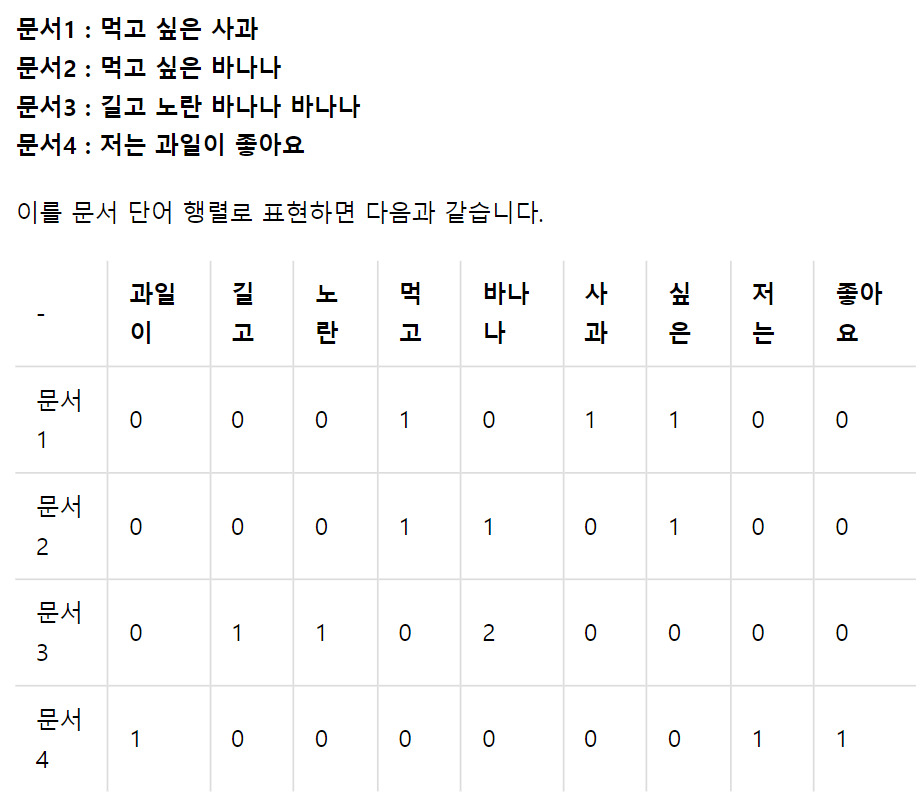

각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기합니다. 문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 갖습니다. (여기서는 하지 않았으나, 원한다면 한국어에서 불용어에 해당되는 조사들 또한 제거하여 더 정제된 DTM을 만들 수도 있을 것입니다.)

**2.문서 단어 행렬(Document-Term Matrix)의 한계**

DTM은 매우 간단하고 구현하기도 쉽지만, 본질적으로 가지는 몇 가지 한계들이 있습니다.

1. 희소 표현(Sparse representation)

원-핫 벡터는 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 된다는 특징이 있었습니다. 이 특징은 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 점에서 원-핫 벡터의 단점이었습니다. DTM도 마찬가지입니다. DTM에서의 각 행을 문서 벡터라고 해봅시다. 각 문서 벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기를 가집니다. 만약 가지고 있는 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수백만의 차원을 가질 수도 있습니다. 또한 많은 문서 벡터가 대부분의 값이 0을 가질 수도 있습니다. 당장 위에서 예로 들었던 문서 단어 행렬의 모든 행이 0이 아닌 값보다 0의 값이 더 많은 것을 볼 수 있습니다.

원-핫 벡터나 DTM과 같은 대부분의 값이 0인 표현을 희소 벡터(sparse vector) 또는 희소 행렬(sparse matrix)라고 부르는데, 희소 벡터는 많은 양의 저장 공간과 계산을 위한 리소스를 필요로 합니다. 이러한 이유로 전처리를 통해 단어 집합의 크기를 줄이는 일은 BoW 표현을 사용하는 모델에서 중요할 수 있습니다. 앞서 배운 텍스트 전처리 방법을 사용하여 구두점, 빈도수가 낮은 단어, 불용어를 제거하고, 어간이나 표제어 추출을 통해 단어를 정규화하여 단어 집합의 크기를 줄일 수 있습니다.

2. 단순 빈도 수 기반 접근

여러 문서에 등장하는 모든 단어에 대해서 빈도 표기를 하는 이런 방법은 때로는 한계를 가지기도 합니다. 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장할 수 밖에 없습니다. 그런데 유사한 문서인지 비교하고 싶은 문서1, 문서2, 문서3에서 동일하게 the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됩니다.

각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있습니다. 앞서 불용어(stopwords)는 자연어 처리에 있어 의미를 거의 갖지 못하는 단어라고 언급한 바 있습니다. 그렇다면 DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법은 없을까요? 이를 위해 사용하는 것이 다음 챕터에서 배우게 될 TF-IDF입니다.

사이킷런의 CountVectorizer를 사용하여 DTM을 만드는 실습은 다음 챕터에서 진행합니다.

# **TF-IDF(Term Frequency-Inverse Document Frequency)**

이번 챕터에서는 DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치에 대해서 알아보도록 하겠습니다. TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 더 많은 정보를 고려하여 문서들을 비교할 수 있습니다. (주의할 점은 TF-IDF가 DTM보다 항상 성능이 뛰어나진 않습니다.)

**1.TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)**

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 사용 방법은 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있습니다.

TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.

(1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
생소한 글자때문에 어려워보일 수 있지만, 잘 생각해보면 TF는 이미 앞에서 구한 적이 있습니다. TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문입니다.

(2) df(t) : 특정 단어 t가 등장한 문서의 수.
여기서 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가집니다. 앞서 배운 DTM에서 바나나는 문서2와 문서3에서 등장했습니다. 이 경우, 바나나의 df는 2입니다. 문서3에서 바나나가 두 번 등장했지만, 그것은 중요한 게 아닙니다. 심지어 바나나란 단어가 문서2에서 100번 등장했고, 문서3에서 200번 등장했다고 하더라도 바나나의 df는 2가 됩니다.



(3) idf(d, t) : df(t)에 반비례하는 수.

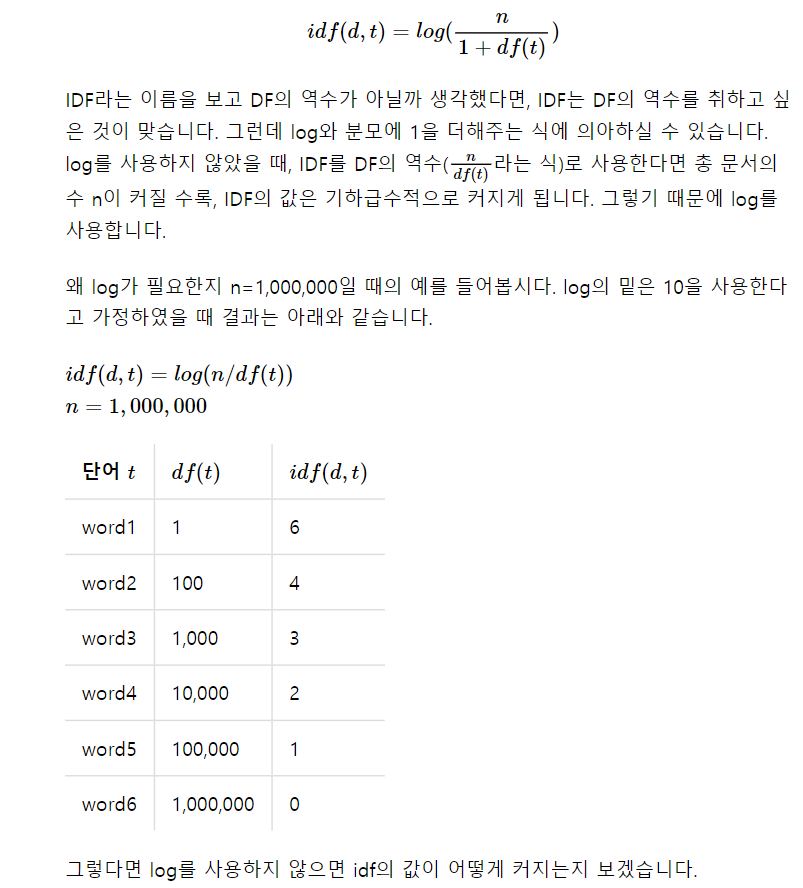

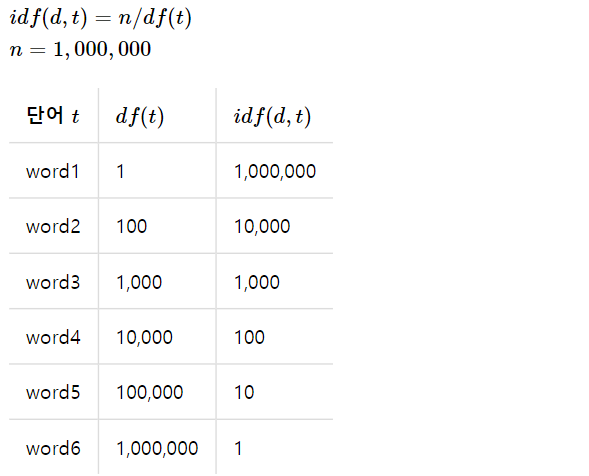

또 다른 직관적인 설명은 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장합니다. 그런데 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 또 최소 수백 배는 더 자주 등장하는 편입니다. 이 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있습니다. 로그를 씌우면 이런 격차를 줄이는 효과가 있습니다.

또한 log 안의 식에서 분모에 1을 더해주는 이유는 첫번째 이유로는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다.

TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.



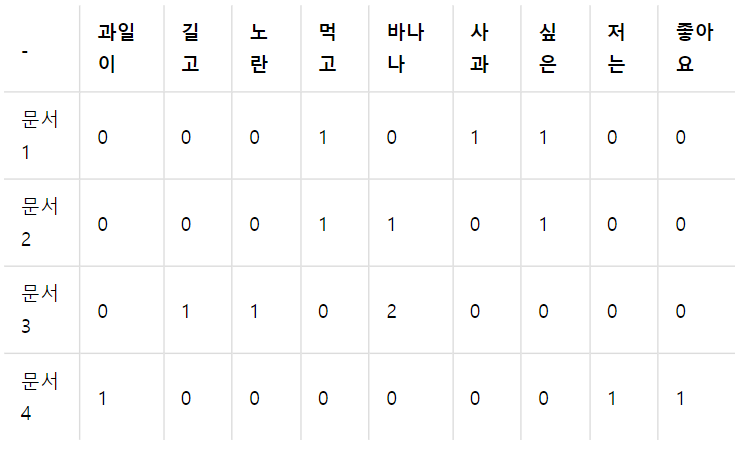

앞서 DTM을 설명하기위해 들었던 위의 예제를 가지고 TF-IDF에 대해 이해해보도록 하겠습니다. 우선 TF는 앞서 사용한 DTM을 그대로 사용하면, 그것이 각 문서에서의 각 단어의 TF가 됩니다.

그렇다면 이제 구해야할 것은 TF와 곱해야할 값인 IDF입니다. 로그는 자연 로그를 사용하도록 하겠습니다. 자연 로그는 로그의 밑을 자연 상수 e(e=2.718281...)를 사용하는 로그를 말합니다. IDF 계산을 위해 사용하는 로그의 밑은 TF-IDF를 사용하는 사용자가 임의로 정할 수 있는데, 여기서 로그는 마치 기존의 값에 곱하여 값의 크기를 조절하는 상수의 역할을 합니다. 그런데 보통 각종 프로그래밍 언어나 프로그램에서 패키지로 지원하는 TF-IDF의 로그는 대부분 자연 로그를 사용합니다. 그렇기 때문에 저 또한 자연 로그를 사용하도록 하겠습니다. 자연 로그는 보통 log라고 표현하지 않고, ln이라고 표현합니다.

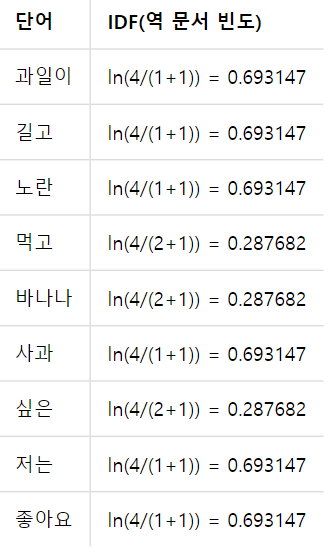

문서의 총 수는 4이기 때문에 ln 안에서 분자는 늘 4으로 동일합니다. 분모의 경우에는 각 단어가 등장한 문서의 수(DF)를 의미하는데, 예를 들어서 '먹고'의 경우에는 총 2개의 문서(문서1, 문서2)에 등장했기 때문에 2라는 값을 가집니다. 각 단어에 대해서 IDF의 값을 비교해보면 문서 1개에만 등장한 단어와 문서2개에만 등장한 단어는 값의 차이를 보입니다. IDF는 여러 문서에서 등장한 단어의 가중치를 낮추는 역할을 하기 때문입니다.

그러면 이제 TF-IDF를 계산해보도록 하겠습니다. TF는 DTM을 그대로 가져오면 각 문서에서의 각 단어의 TF를 가져오게 되기 때문에, 앞서 사용한 DTM에서 단어 별로 위의 IDF값을 그대로 곱해주면 TF-IDF가 나오게 됩니다.

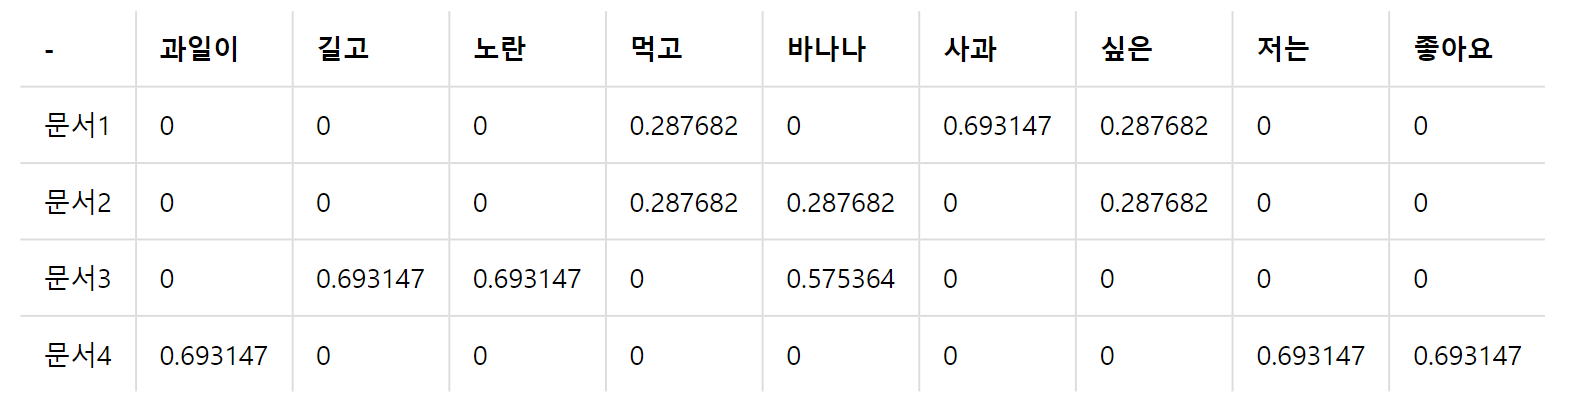

사실 예제 문서가 굉장히 간단하기 때문에 계산은 매우 쉽습니다. 문서3에서의 바나나만 TF 값이 2이므로 IDF에 2를 곱해주고, 나머진 TF 값이 1이므로 그대로 IDF 값을 가져오면 됩니다. 문서2에서의 바나나의 TF-IDF 가중치와 문서3에서의 바나나의 TF-IDF 가중치가 다른 것을 볼 수 있습니다. 수식적으로 말하면, TF가 각각 1과 2로 달랐기 때문인데 TF-IDF에서의 관점에서 보자면 TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서 내에서 중요한 단어로 판단하기 때문입니다. 문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단하는 것입니다.

**2. 파이썬으로 TF-IDF 직접 구현하기**

위의 계산 과정을 파이썬으로 직접 구현해보겠습니다. 우선 필요한 도구들을 임포트합니다.

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [ ]:
#앞의 설명에서 사용한 4개의 문서를 docs에 저장합니다.
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
#TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현합니다.

N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
#이제 TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력해보겠습니다.

result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
#정상적으로 DTM이 출력되었습니다. 이제 각 단어에 대한 IDF 값을 구해봅시다.

result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
#위에서 수기로 구한 IDF 값들과 정확히 일치합니다. 이제 TF-IDF 행렬을 출력해봅시다.

result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


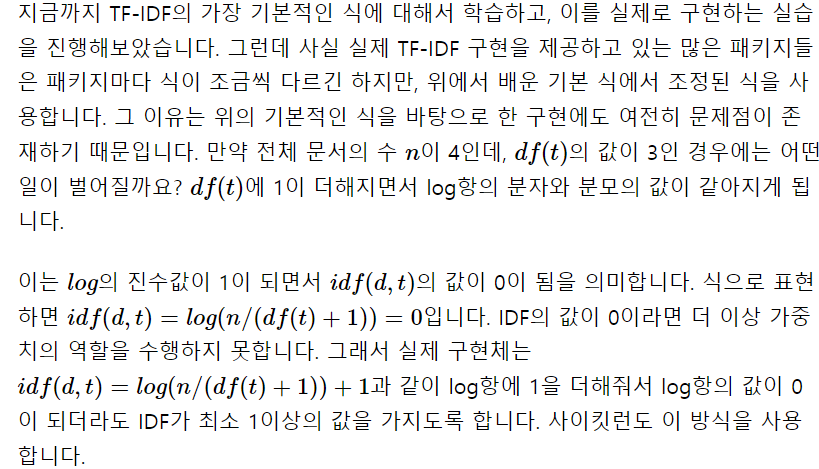

**3. 사이킷런을 이용한 DTM과 TF-IDF 실습**

사이킷런을 통해 DTM과 TF-IDF를 만들어보겠습니다. BoW 챕터에서 배운 CountVectorizer를 사용하면 DTM을 만들 수 있습니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


DTM이 완성되었습니다. DTM에서 각 단어의 인덱스가 어떻게 부여되었는지를 확인하기 위해, 인덱스를 확인해보았습니다. 첫번째 열의 경우에는 0의 인덱스를 가진 do입니다. do는 세번째 문서에만 등장했기 때문에, 세번째 행에서만 1의 값을 가집니다. 두번째 열의 경우에는 1의 인덱스를 가진 know입니다. know는 첫번째 문서에만 등장했기 때문에 첫번째 행에서만 1의 값을 가집니다.

사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공합니다. 향후 실습을 하다가 혼란이 생기지 않도록 언급하자면, 사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 식에서 좀 더 조정된 다른 식을 사용합니다. 하지만 크게 다른 식은 아니며(IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이), 여전히 TF-IDF가 가진 의도를 그대로 갖고 있으므로 사이킷런의 TF-IDF를 그대로 사용하셔도 좋습니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


이제 BoW, DTM, TF-IDF에 대해서 전부 학습했습니다. 문서들 간의 유사도를 구하기 위한 재료 손질하는 방법을 배운 셈입니다. 케라스로도 DTM과 TF-IDF 행렬을 만들 수 있는데, 이는 다층 퍼셉트론으로 텍스트 분류하기 챕터에서 별도로 다루겠습니다. 이제 다음 챕터에서 유사도를 구하는 방법을 학습하고 유사도를 구하는 실습을 진행해보겠습니다.

# **05.벡터의 유사도(Vector Similarity)**
문서의 유사도를 구하는 일은 자연어 처리의 주요 주제 중 하나입니다

## **1)코사인 유사도(Cosine Similarity)**

BoW나 BoW에 기반한 단어 표현 방법인 DTM, TF-IDF, 또는 뒤에서 배우게 될 워드투벡터(Word2Vec) 등과 같이 단어를 수치화할 수 있는 방법을 이해했다면, 이러한 표현 방법에 대해서 코사인 유사도를 이용하여 문서의 유사도를 구하는 게 가능합니다.




**1. 코사인 유사도(Cosine Similarity)**

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

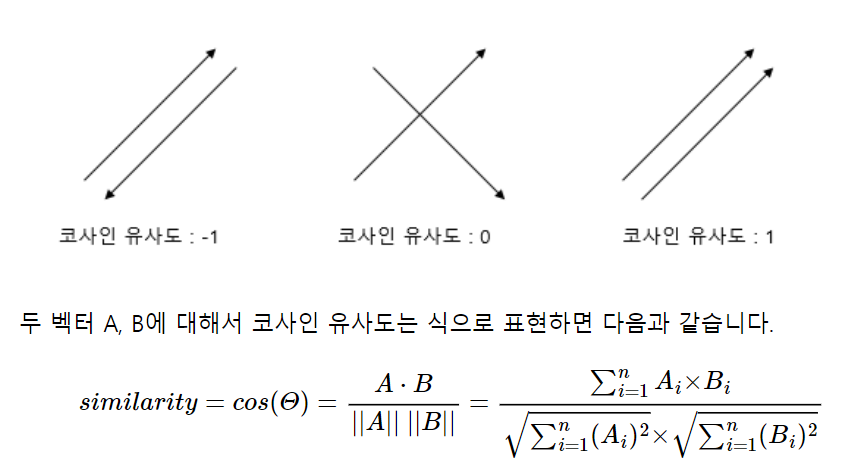

문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다. 그렇다면 문서 단어 행렬에 대해서 코사인 유사도를 구해보는 간단한 예제를 진행해보겠습니다.

- 문서1 : 저는 사과 좋아요
- 문서2 : 저는 바나나 좋아요
- 문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

위의 세 문서에 대해서 문서 단어 행렬을 만들면 이와 같습니다.

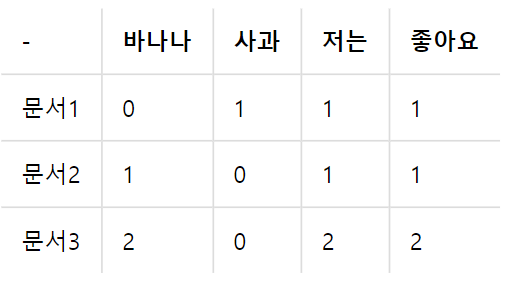

파이썬에서는 코사인 유사도를 구하는 방법은 여러가지가 있는데 여기서는 Numpy를 이용해서 계산해보겠습니다.

In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
#코사인 유사도를 계산하는 함수를 만들었습니다.

doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [ ]:
#예를 들었던 문서1, 문서2, 문서3에 대해서 각각 BoW를 만들었습니다. 이제 각 문서에 대한 코사인 유사도를 계산해보겠습니다.

print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 코사인 유사도를 사용하지 않는다고 가정하였을 때, 문서 A에 대해서 모든 문서와의 유사도를 구한다고 가정해봅시다. 다른 문서들과 문서 B나 거의 동일한 패턴을 가지는 문서임에도 문서 B가 단순히 다른 문서들보다 원문 길이가 긴 문서라는 이유로 (단어의 빈도수가 일정하게 더 높아질 때) 다른 문서들보다 유사도가 더 높게 나온다면 이는 우리가 원하는 결과가 아닙니다. 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.

이는 코사인 유사도는 유사도를 구할 때, 벡터의 크기가 아니라 벡터의 방향(패턴)에 초점을 두기 때문입니다. 코사인 유사도가 벡터의 유사도를 구하는 또 다른 방법인 내적과 가지는 차이점입니다.

**2. 유사도를 이용한 추천 시스템 구현하기**

캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset

원본 파일은 위 링크에서 movies_metadata.csv 파일을 다운로드 받으면 됩니다. 해당 데이터는 총 24개의 열을 가진 45,466개의 샘플로 구성된 영화 정보 데이터입니다.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
data = pd.read_csv('/content/movies_metadata.csv.zip', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


우선 다운로드 받은 훈련 데이터에서 2개의 샘플만 출력하여, 데이터가 어떤 형식을 갖고있는지 확인합니다. csv 파일을 읽기 위해서 파이썬 라이브러리인 pandas를 갖고왔는데, pandas는 뒤에서도 pd란 이름으로 계속해서 유용하게 쓰이게 됩니다.

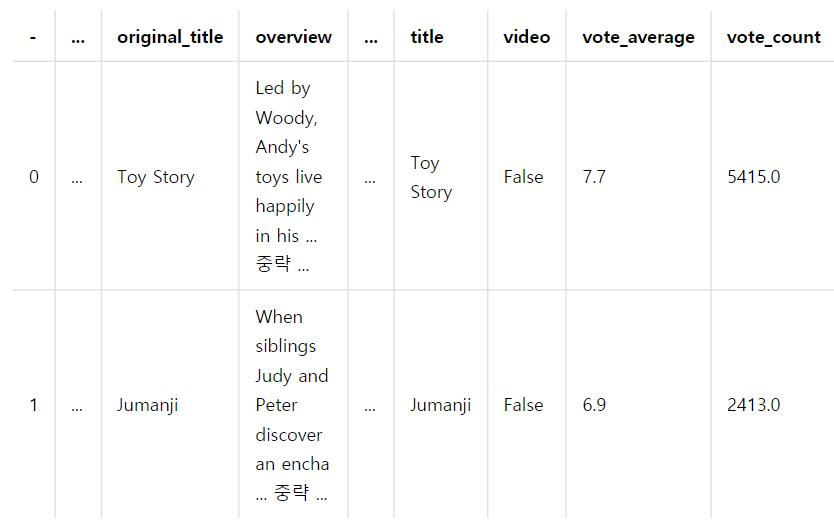

훈련 데이터는 총 24개의 열을 갖고있으나, 책의 지면상 일부 생략하였습니다. 여기서 코사인 유사도에 사용할 데이터는 영화 제목에 해당하는 title 열과 줄거리에 해당하는 overview 열입니다. 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 줄거리가 유사한 영화를 찾아서 추천하는 시스템을 만들 것입니다.

In [ ]:
data = data.head(20000)

만약 훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면, 이와 같이 데이터를 줄여서 재저장할 수 있습니다. 저는 20,000개의 샘플만 가지고 학습해보겠습니다. tf-idf를 할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다. tf-idf의 대상이 되는 data의 overview 열에 Null 값이 있는지 확인합니다.


In [ ]:
data['overview'].isnull().sum()

135

135개의 샘플에서 Null 값이 있다고 합니다. pandas를 이용하면 Null 값을 처리하는 도구인 fillna()를 사용할 수 있습니다. 괄호 안에 Null 대신 넣고자하는 값을 넣으면 되는데, 이 경우에는 빈 값(empty value)으로 대체하여 Null 값을 제거합니다.

In [ ]:
# overview에서 Null 값을 가진 경우에는 Null 값을 제거
data['overview'] = data['overview'].fillna('')

Null 값을 제거하였습니다. 이제 .isnull().sum()를 수행하면 0의 값이 나옵니다. 이제 tf-idf를 수행합니다.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

(20000, 47487)


overview 열에 대해서 tf-idf를 수행했습니다. 20,000개의 영화를 표현하기위해 총 47,487개의 단어가 사용되었음을 보여주고 있습니다. 이제 코사인 유사도를 사용하면 바로 문서의 유사도를 구할 수 있습니다.

In [ ]:
#코사인 유사도를 구합니다.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#영화의 타이틀과 인덱스를 가진 테이블을 만듭니다. 이 중 5개만 출력해보도록 하겠습니다.
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [ ]:
#이 테이블의 용도는 영화의 타이틀을 입력하면 인덱스를 리턴하기 위함입니다.

idx = indices['Father of the Bride Part II']
print(idx)

4


In [ ]:
#이제 선택한 영화에 대해서 코사인 유사도를 이용하여, 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [ ]:
#영화 다크 나이트 라이즈와 overview가 유사한 영화들을 찾아보겠습니다.

get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

가장 유사한 영화가 출력되는데, 영화 다크 나이트가 첫번째고, 그 외에도 전부 배트맨 영화를 찾아낸 것을 확인할 수 있습니다.

**여러가지 유사도 기법**

문서의 유사도를 구하기 위한 방법으로는 코사인 유사도 외에도 여러가지 방법들이 있습니다. 여기서는 문서의 유사도를 구할 수 있는 다른 방법들을 학습합니다.

**1. 유클리드 거리(Euclidean distance)**

유클리드 거리(euclidean distance)는 문서의 유사도를 구할 때 자카드 유사도나 코사인 유사도만큼, 유용한 방법은 아닙니다. 하지만 여러 가지 방법을 이해하고, 시도해보는 것 자체만으로 다른 개념들을 이해할 때 도움이 되므로 의미가 있습니다.

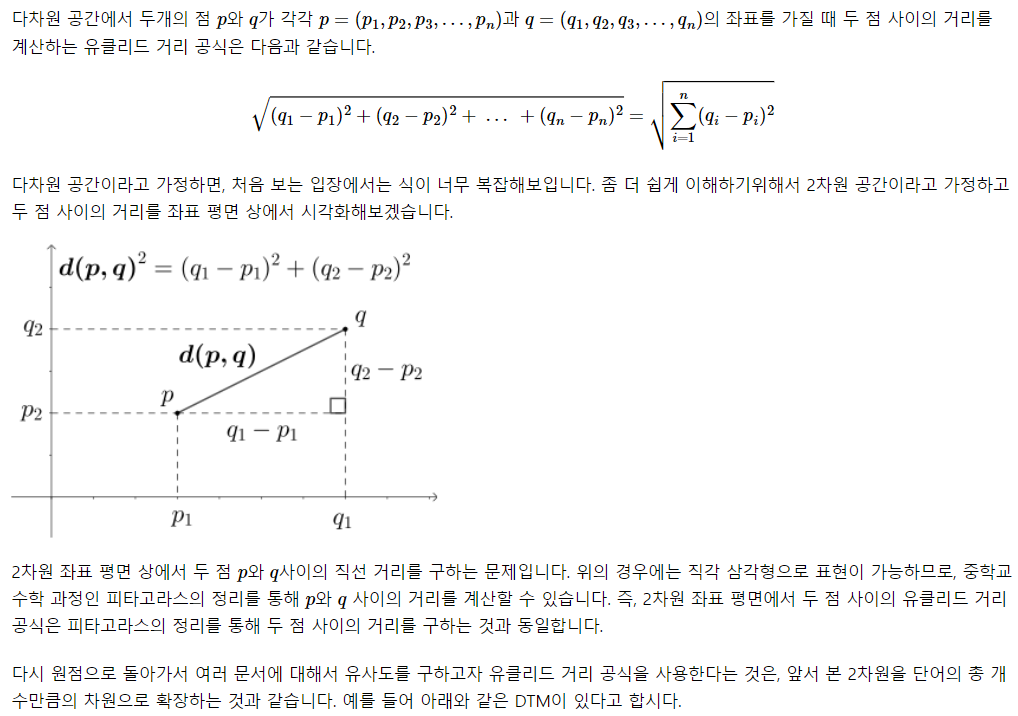

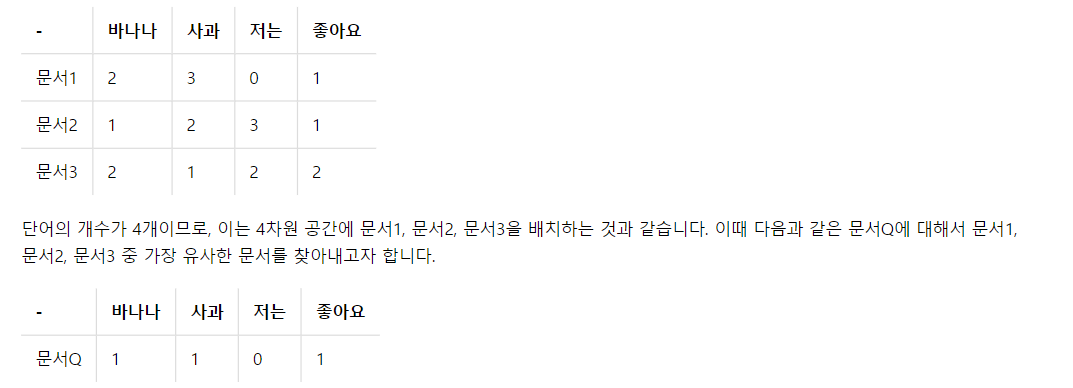

In [ ]:
import numpy as np
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print(dist(doc1,docQ))
print(dist(doc2,docQ))
print(dist(doc3,docQ))

2.23606797749979
3.1622776601683795
2.449489742783178


유클리드 거리의 값이 가장 작다는 것은, 문서 간의 거리가 가장 가깝다는 것을 의미합니다. 즉, 문서1이 문서Q와 가장 유사하다고 볼 수 있습니다.

**2. 자카드 유사도(Jaccard similarity)**

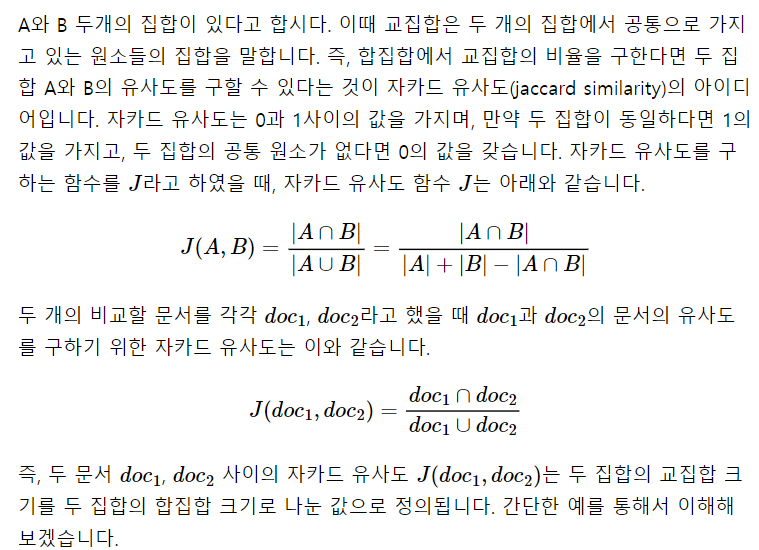





In [ ]:
# 다음과 같은 두 개의 문서가 있습니다.
# 두 문서 모두에서 등장한 단어는 apple과 banana 2개.
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화를 수행합니다.
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

# 토큰화 결과 출력
print(tokenized_doc1)
print(tokenized_doc2)

['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [ ]:
#이 때 문서1과 문서2의 합집합을 구해보겠습니다.

union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)
#문서1과 문서2의 합집합의 단어의 총 개수는 12개인 것을 확인할 수 있습니다. 

{'coupon', 'you', 'everyone', 'like', 'apple', 'card', 'love', 'passport', 'banana', 'holder', 'watch', 'likey'}


In [ ]:
#그렇다면, 문서1과 문서2의 교집합을 구해보겠습니다. 즉, 문서1과 문서2에서 둘 다 등장한 단어를 구하게 됩니다.

intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

{'banana', 'apple'}


In [ ]:
#문서1과 문서2에서 둘 다 등장한 단어는 banana와 apple 총 2개입니다. 이제 교집합의 수를 합집합의 수로 나누면 자카드 유사도가 계산됩니다.

print(len(intersection)/len(union)) # 2를 12로 나눔.

0.16666666666666666


# **레벤슈타인 거리를 이용한 오타 정정**
해당 자료는 온라인에서는 비공개 처리되어
강의 수강생분들의 수강 자료나 출판 예정인 오프라인 출판물에서 확인할 수 있습니다.

해당 챕터를 안 한다고 해서 후의 진행과는 상관없으므로 그냥 무시하고 이어서 계속 공부하시면 됩니다.